In [57]:
import numpy as np
import pandas as pd

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [59]:
crime_cctv= pd.read_csv(r"C:\Users\LG\Desktop\공모전\data\crime_ratio.csv", encoding='cp949')
crime_cctv

,구별,cctv_count,crime_ratio
0,종로구,12578,0.308355
1,중구,64609,11627.000000
2,용산구,18278,0.329079
3,성동구,23694,0.086156
4,광진구,18622,0.289708
5,동대문구,173091,17819.000000
6,중랑구,20618,0.223322
7,성북구,25687,0.144177
8,강북구,16769,0.250828
9,도봉구,9831,0.049288


In [60]:
crime_cctv.drop(columns=['crime_ratio'], inplace=True)
crime_cctv

,구별,cctv_count
0,종로구,12578
1,중구,64609
2,용산구,18278
3,성동구,23694
4,광진구,18622
5,동대문구,173091
6,중랑구,20618
7,성북구,25687
8,강북구,16769
9,도봉구,9831


In [61]:
crime_cctv = crime_cctv.set_index('구별', drop=True)
crime_cctv

,cctv_count
구별,
종로구,12578
중구,64609
용산구,18278
성동구,23694
광진구,18622
동대문구,173091
중랑구,20618
성북구,25687
강북구,16769


In [62]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일링
scaler = MinMaxScaler()
crime_cctv[['Scaled_CCTV_COUNT']] = scaler.fit_transform(crime_cctv[['cctv_count']])

crime_cctv


,cctv_count,Scaled_CCTV_COUNT
구별,,
종로구,12578,0.009945
중구,64609,0.198317
용산구,18278,0.030581
성동구,23694,0.050189
광진구,18622,0.031827
동대문구,173091,0.591063
중랑구,20618,0.039053
성북구,25687,0.057405
강북구,16769,0.025118


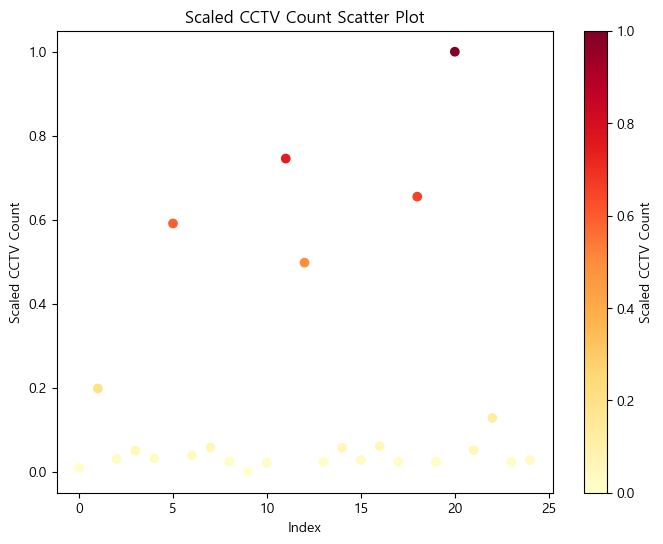

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(range(len(crime_cctv)), crime_cctv['Scaled_CCTV_COUNT'], c=crime_cctv['Scaled_CCTV_COUNT'], cmap='YlOrRd')
plt.title('Scaled CCTV Count Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Scaled CCTV Count')
plt.colorbar(label='Scaled CCTV Count')
plt.show()



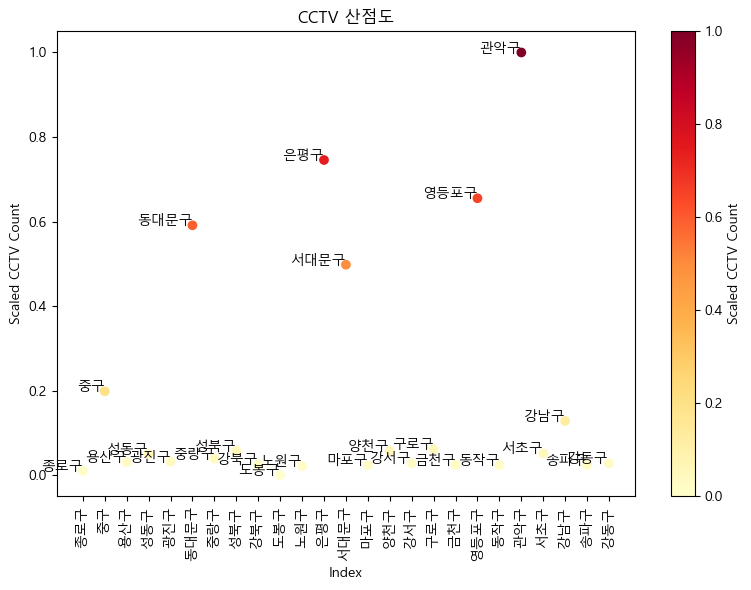

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# 산점도 그리기
scatter = plt.scatter(range(len(crime_cctv)), crime_cctv['Scaled_CCTV_COUNT'], c=crime_cctv['Scaled_CCTV_COUNT'], cmap='YlOrRd')

# 각 데이터포인트에 구 이름 표시
for i, txt in enumerate(crime_cctv.index):
    plt.annotate(txt, (i, crime_cctv['Scaled_CCTV_COUNT'][i]), ha='right')

plt.title('CCTV 산점도')
plt.xlabel('Index')
plt.ylabel('Scaled CCTV Count')
plt.colorbar(scatter, label='Scaled CCTV Count')
plt.xticks(ticks=range(len(crime_cctv)), labels=crime_cctv.index, rotation=90)  # X 축에 구 이름 라벨 표시
plt.tight_layout()
plt.show()
